In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

## Assessing the Dataset

In [23]:
df = pd.read_csv("obesity_data.csv")

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [25]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Visualizing the data in histogram

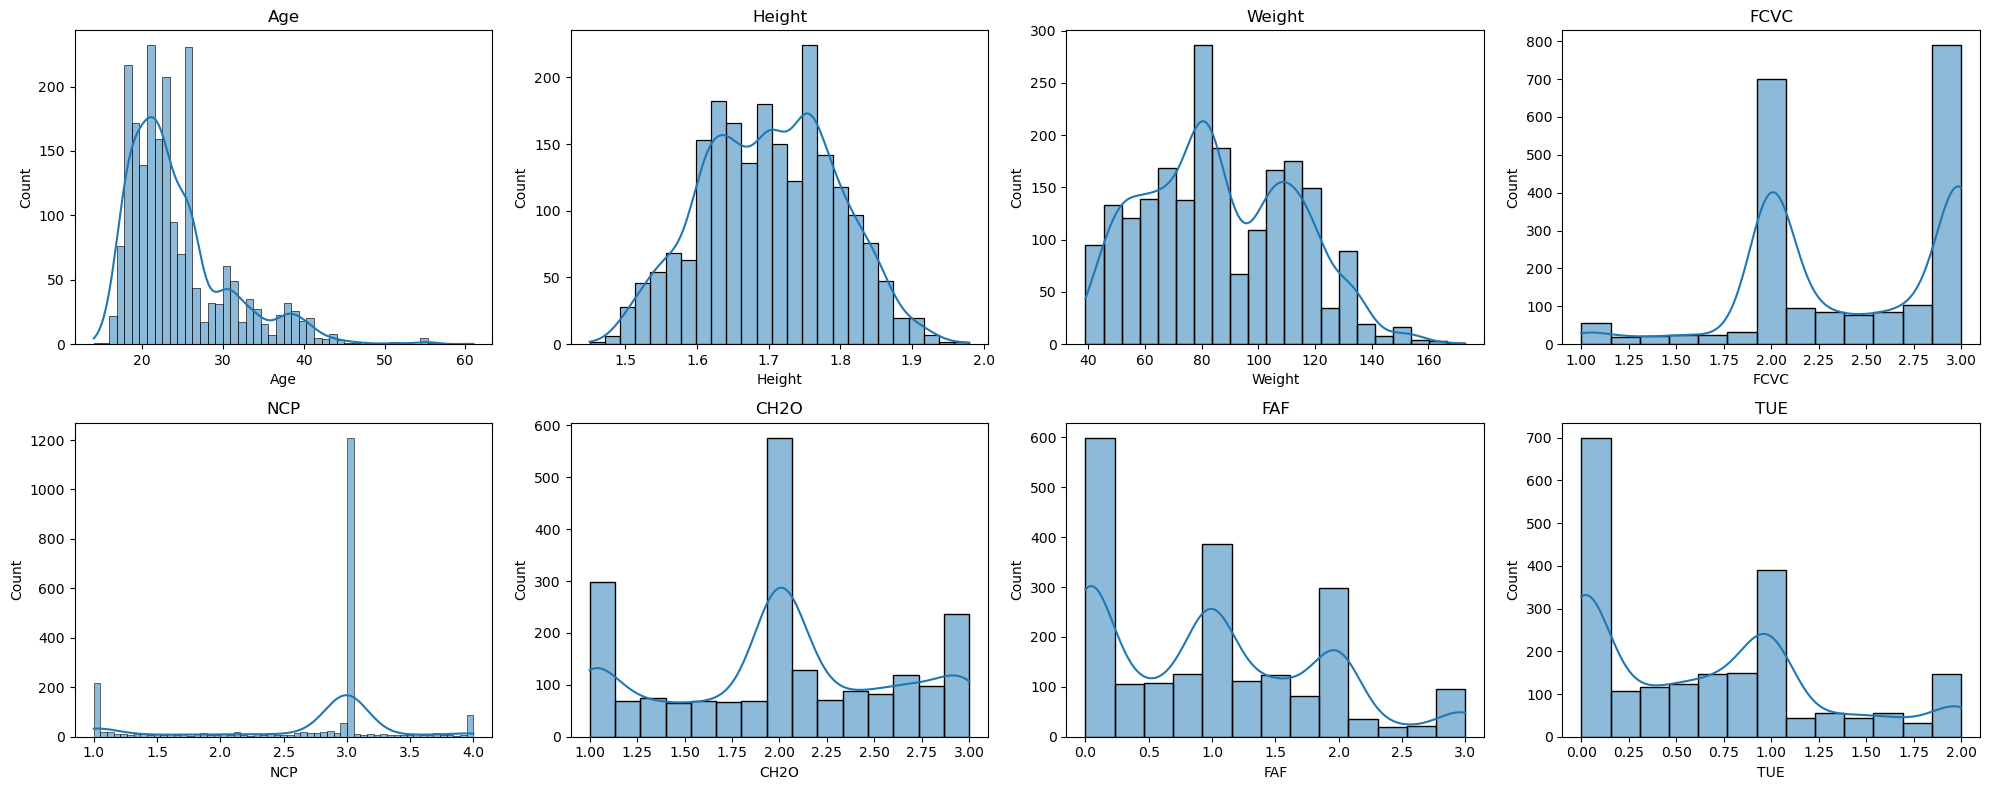

In [27]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
fig, ax = plt.subplots(2, len(numerical_features)//2, figsize=(20, 8))
for i, feature in enumerate(numerical_features):
  sns.histplot(df[feature], ax=ax[i//(len(numerical_features)//2), i%(len(numerical_features)//2)], kde=True)
  ax[i//(len(numerical_features)//2), i%(len(numerical_features)//2)].set_title(feature)
plt.tight_layout()
plt.show()

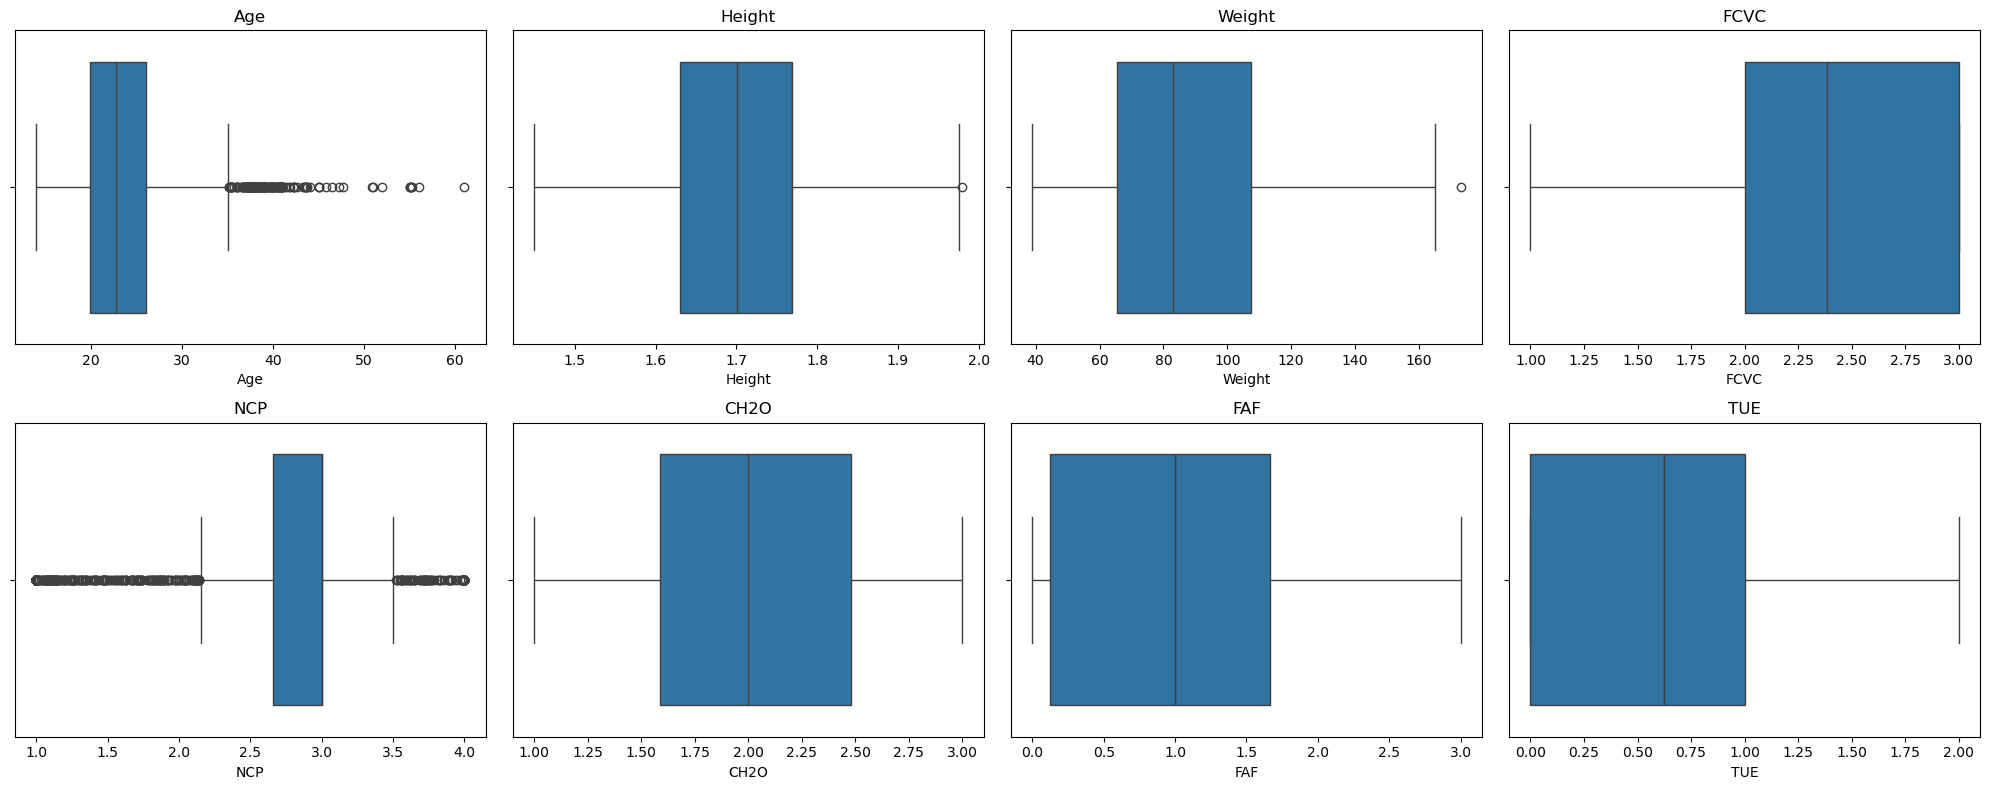

In [28]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
fig, ax = plt.subplots(2, len(numerical_features)//2, figsize=(20, 8))
for i, feature in enumerate(numerical_features):
  row = i // (len(categorical_features)//2)
  col = i % (len(categorical_features)//2)
  sns.boxplot(df[feature], ax=ax[row, col], orient='h')
  ax[row, col].set_title(feature)
plt.tight_layout()
plt.show()

### NCP: How many main meals do you have daily?

In [29]:
# Dibuat menjadi bilangan bulat
df['NCP'] = df['NCP'].round(0)

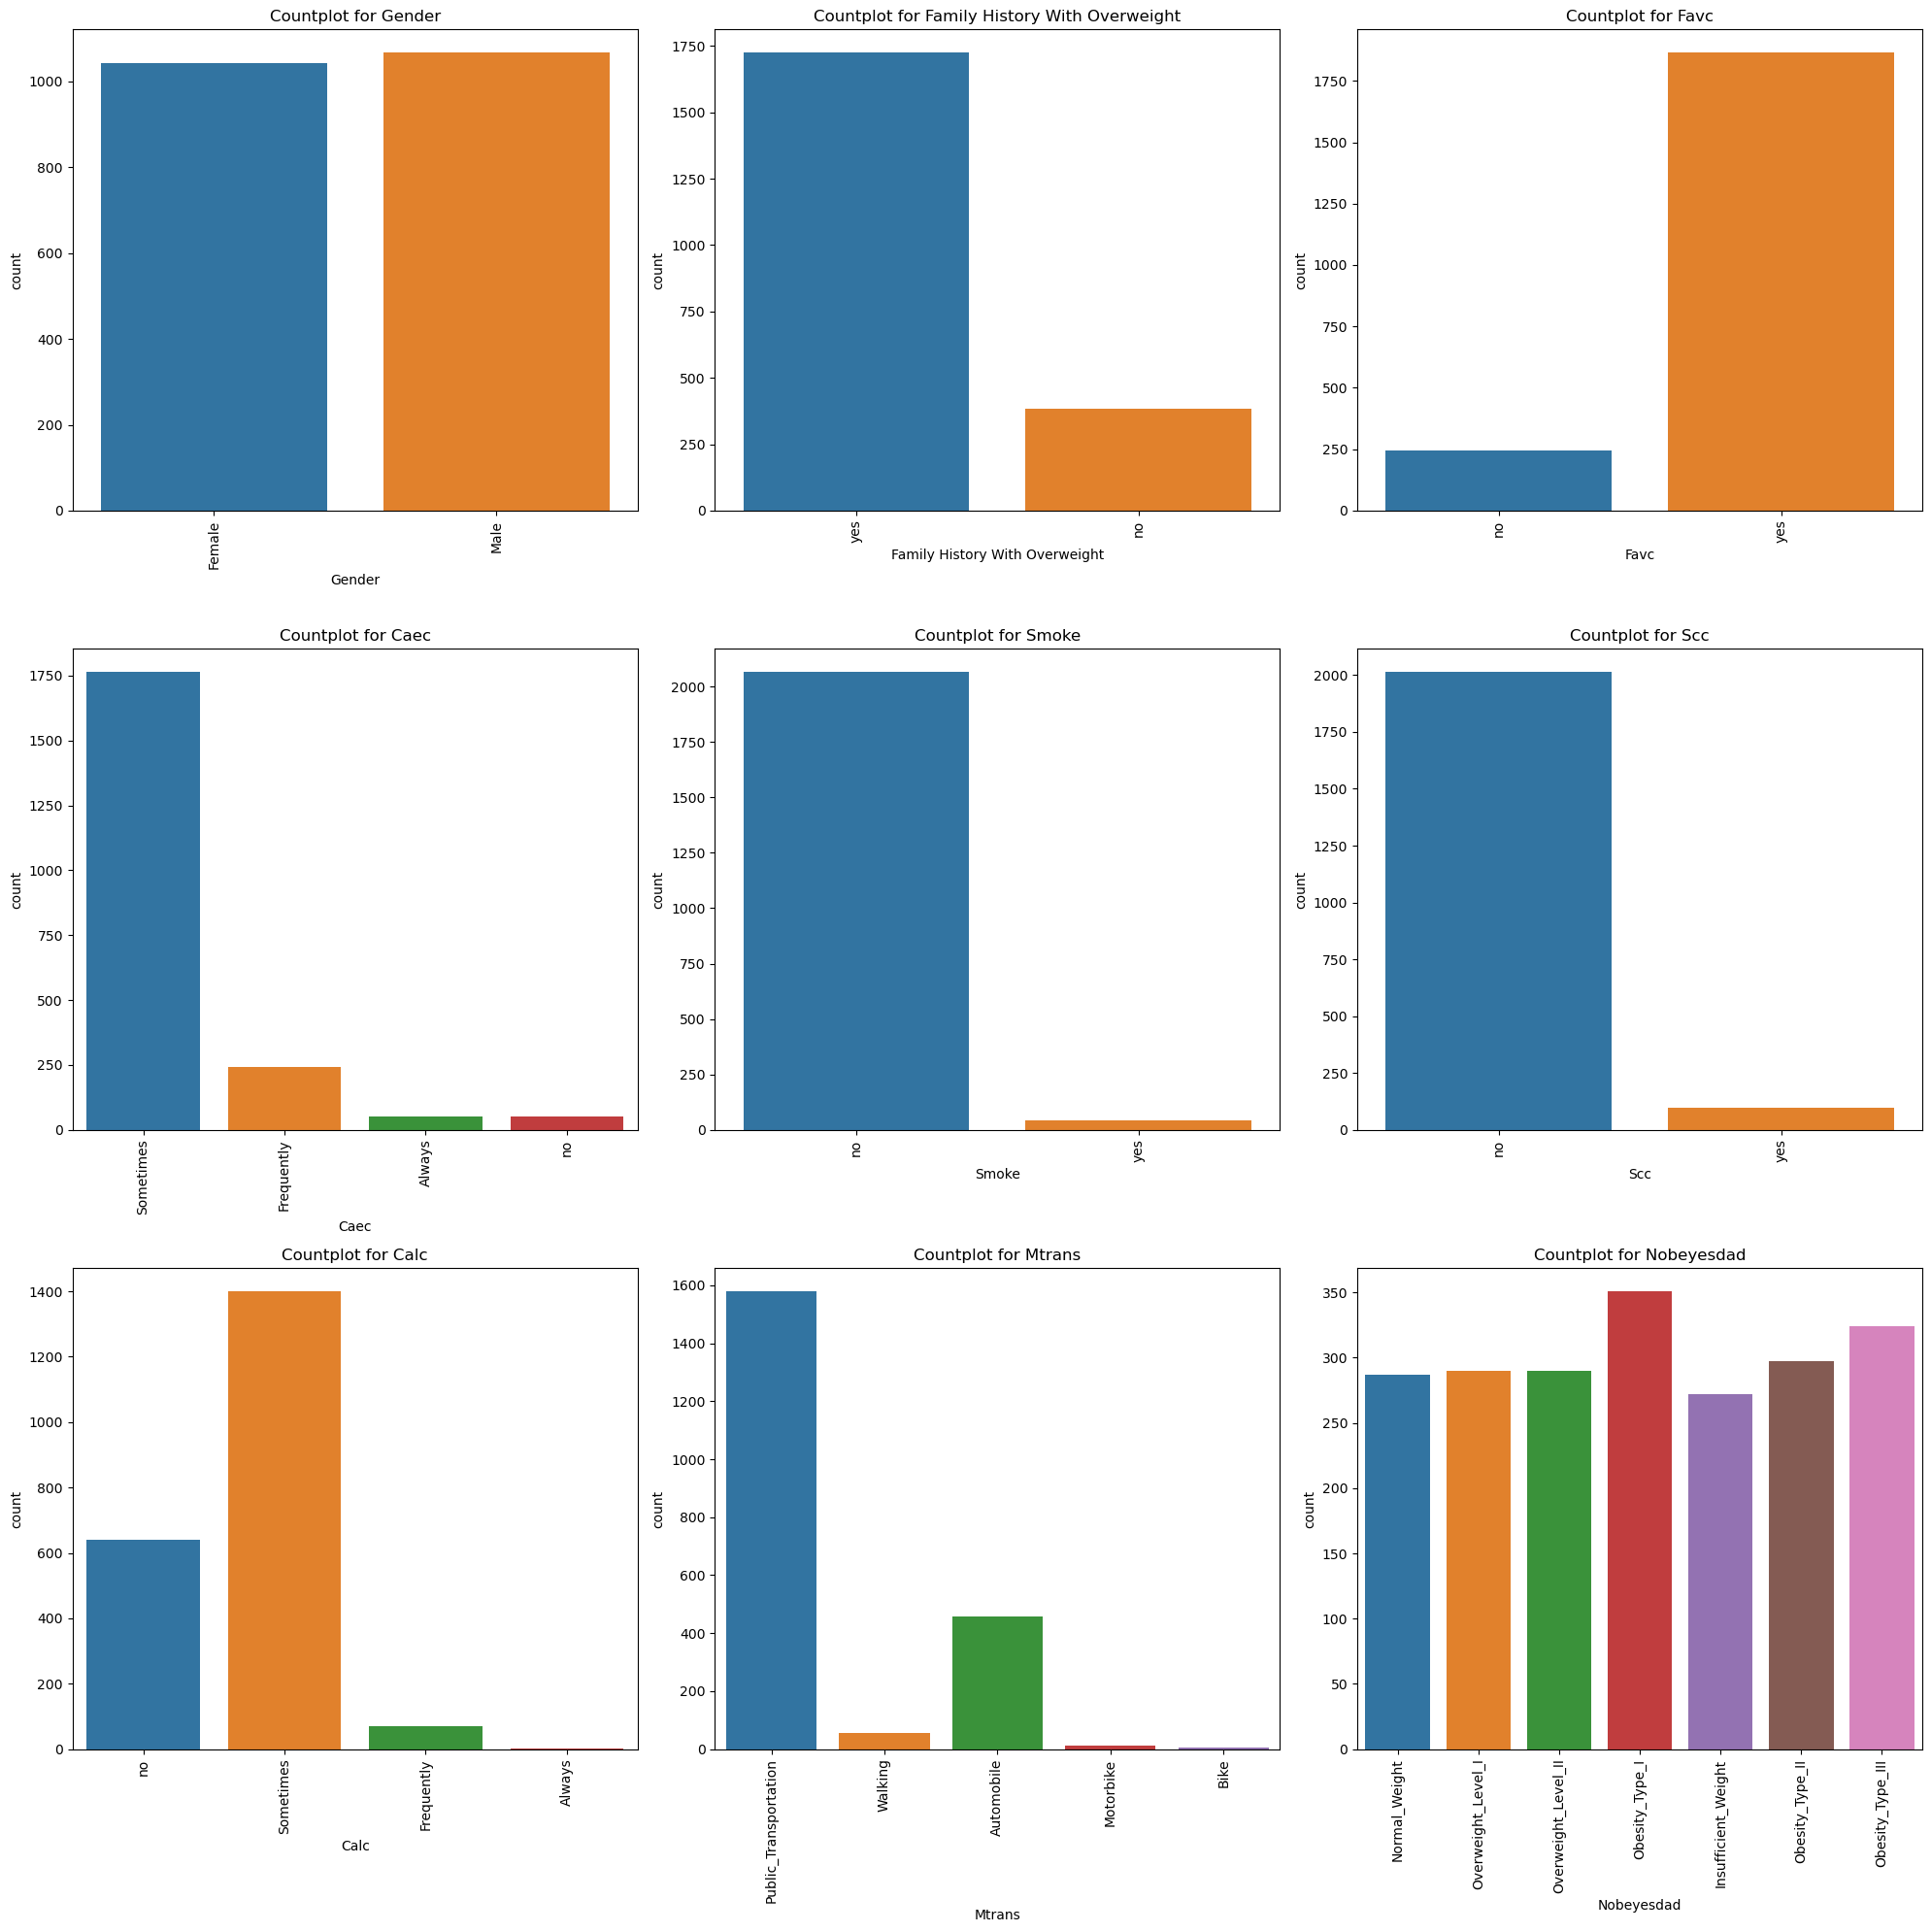

In [30]:
fig, ax = plt.subplots(3, len(categorical_features)//3, figsize=(20, 20))

for i, feature in enumerate(categorical_features):
    row = i // (len(categorical_features)//3)
    col = i % (len(categorical_features)//3)
    sns.countplot(data=df, x=feature, hue=feature, ax=ax[row, col])
    ax[row, col].set_title(f"Countplot for {feature.replace('_', ' ').title()}")
    ax[row, col].tick_params(axis='x', rotation=90)
    ax[row, col].set_xlabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()


In [31]:
encoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(encoder.fit_transform)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [32]:
# Check data types after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

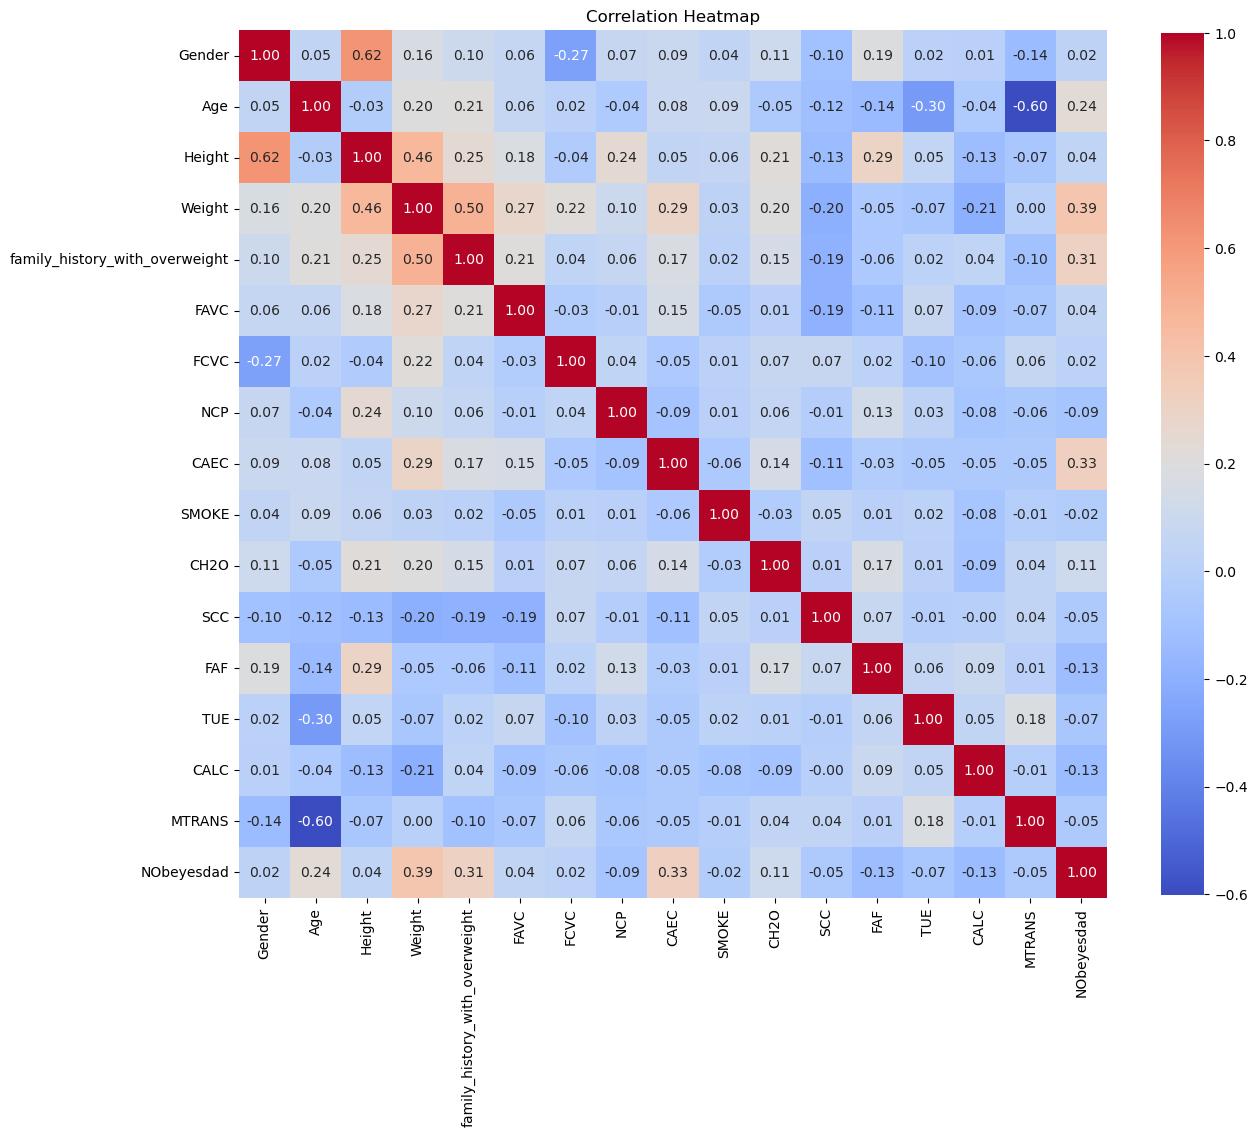

In [33]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

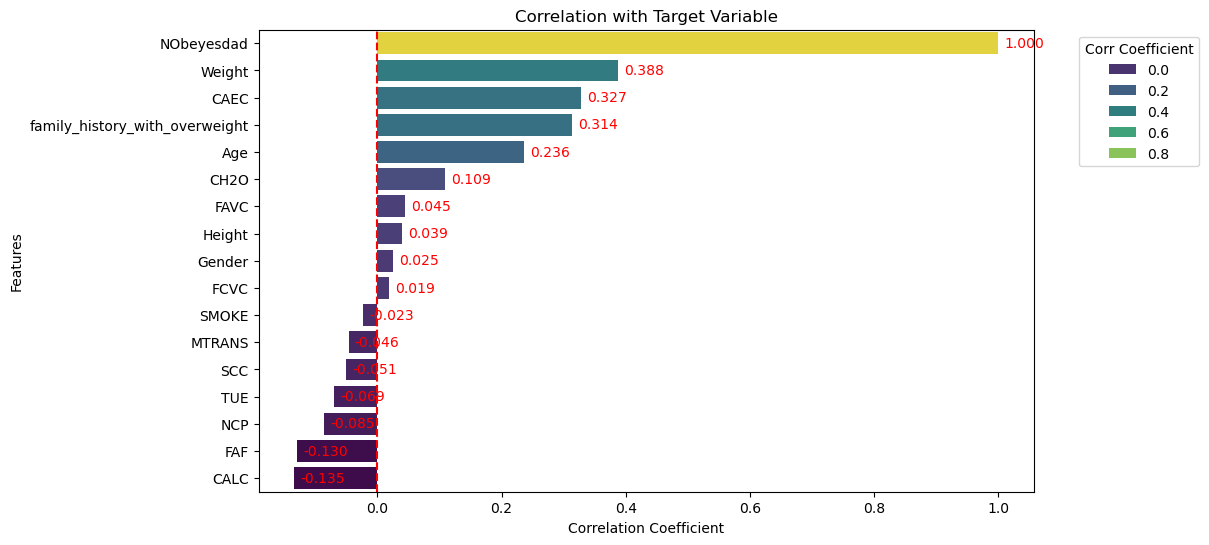

In [34]:
target_corr = corr['NObeyesdad'].sort_values(ascending=False)

labels = target_corr.index

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=labels, palette='viridis', hue=target_corr.values)
plt.axvline(x=0, color='red', linestyle='--')
for i, v in enumerate(target_corr.values):
    plt.text(v + 0.01, i, f"{v:.3f}", color='red', va='center', fontsize=10)
plt.legend(title="Corr Coefficient", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [35]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (select 10 top features)
selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=10)
selector.fit(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())
print("Dropped Features:", X.columns[~selector.get_support()].tolist())


Selected Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FCVC', 'CAEC', 'CH2O', 'FAF', 'TUE']
Dropped Features: ['FAVC', 'NCP', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


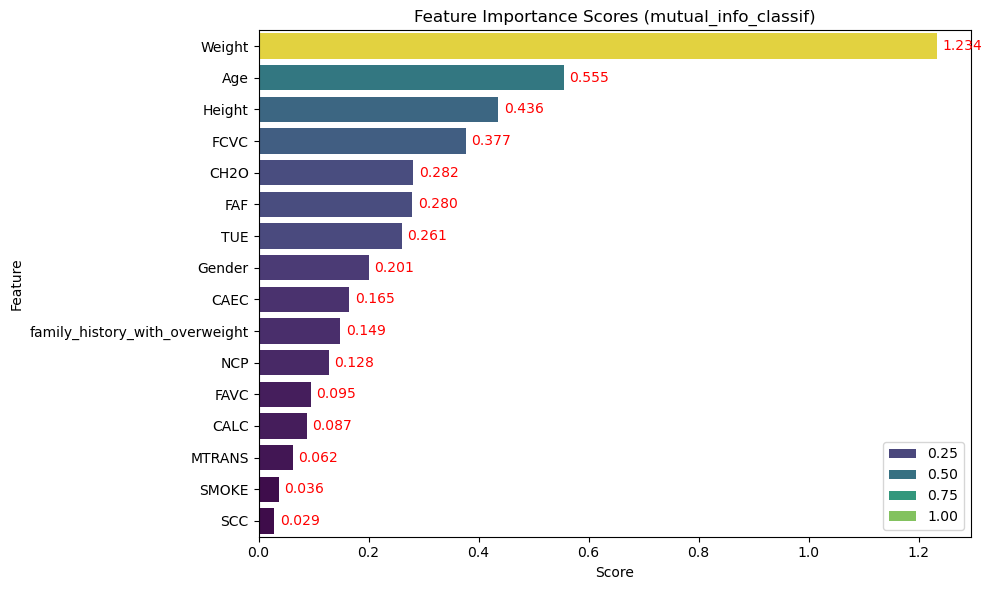

In [36]:
scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=scores.values, y=scores.index, palette="viridis", hue=scores.values)
for i, v in enumerate(scores.values):
    plt.text(v + 0.01, i, f"{v:.3f}", color='red', va='center', fontsize=10)
plt.title("Feature Importance Scores (mutual_info_classif)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [37]:
# Scale the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)



Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9496459190617962
(Random Forest) Accuracy: 0.9598108747044918
(Random Forest) Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.95      0.87      0.91        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.92      0.98      0.95        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



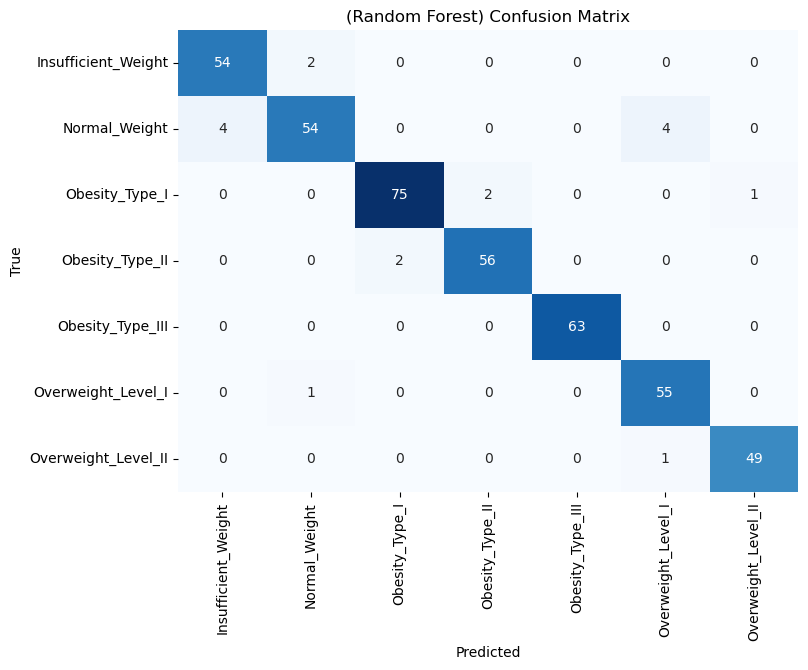

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred = best_rf.predict(X_test_scaled)

print("(Random Forest) Accuracy:", accuracy_score(y_test, y_pred))
print("(Random Forest) Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("(Random Forest) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Score: 0.956763356784216
(Logistic Regression) Accuracy: 0.9598108747044918
(Logistic Regression) Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.90      0.95        62
           2       0.97      0.99      0.98        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.88      0.91      0.89        56
           6       0.90      0.90      0.90        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



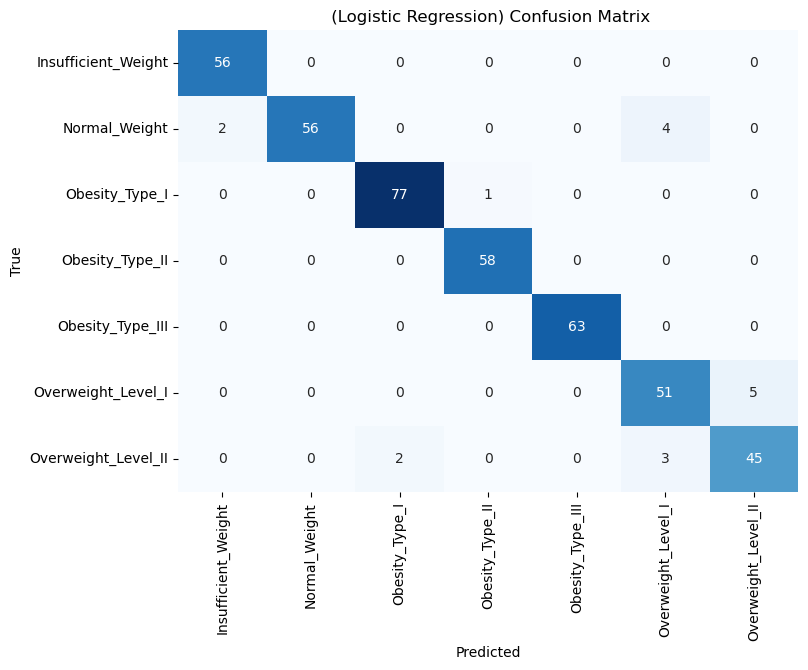

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'multi_class': ['multinomial']
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred_lr = best_lr.predict(X_test_scaled)



print("(Logistic Regression) Accuracy:", accuracy_score(y_test, y_pred_lr))
print("(Logistic Regression) Classification Report:\n", classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title(" (Logistic Regression) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\Kenneth\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.9579390614168716
(XG Boost) Accuracy: 0.9645390070921985
(XG Boost) Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.96      0.89      0.92        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.93      0.96      0.95        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.97      0.96       423
weighted avg       0.97      0.96      0.96       423



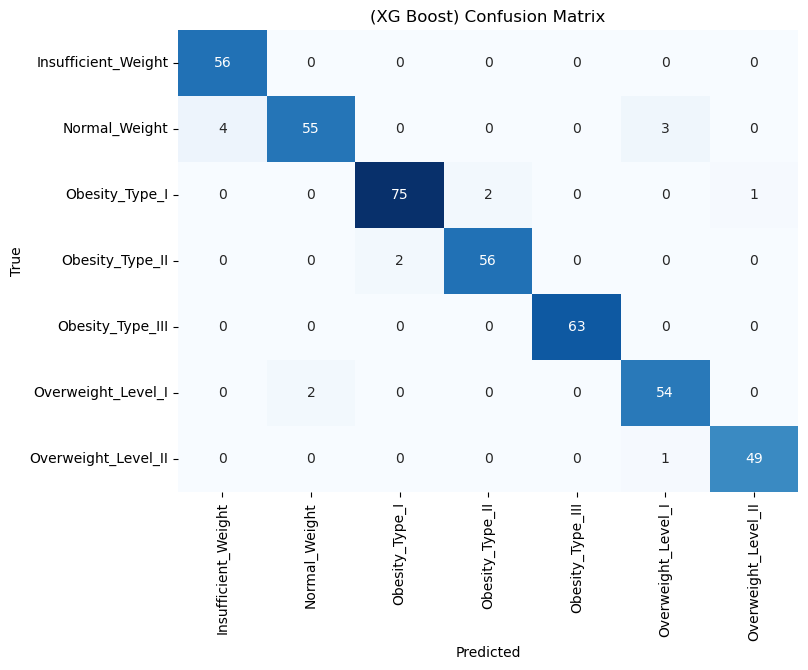

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluasi model
print("(XG Boost) Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("(XG Boost) Classification Report:\n", classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("(XG Boost) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9626850733972597
(Light GBM) Accuracy: 0.9645390070921985
(Light GBM)) Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.97      0.90      0.93        62
           2       0.96      0.95      0.95        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.96      0.96      0.96        56
           6       0.98      1.00      0.99        50

    accuracy                           0.96       423
   macro avg       0.96      0.97      0.97       423
weighted avg       0.97      0.96      0.96       423



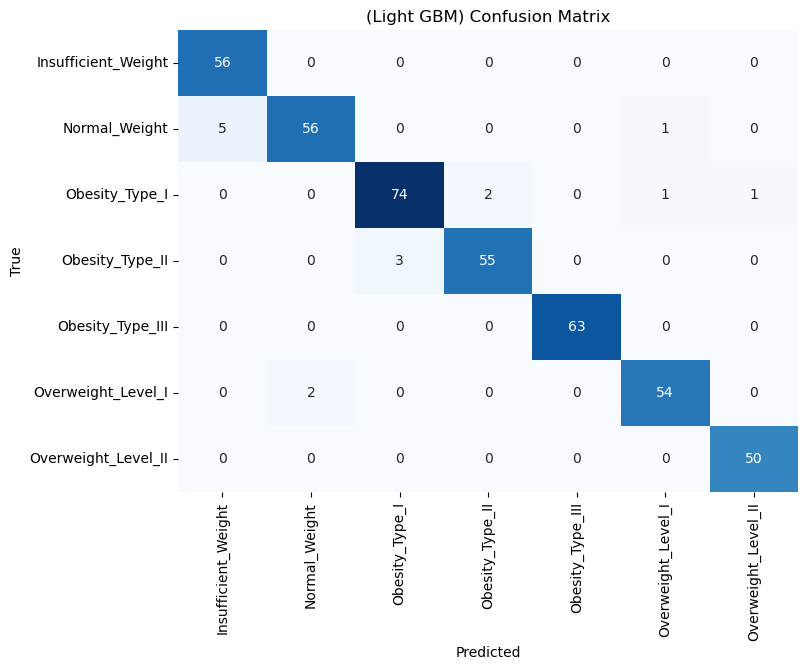

In [41]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier(random_state=42, verbose=-1) #verbose=-1 untuk mematikan log output data trainning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_lgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred_lgb = best_lgb.predict(X_test_scaled)

# Evaluasi model
print("(Light GBM) Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("(Light GBM)) Classification Report:\n", classification_report(y_test, y_pred_lgb))
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("(Light GBM) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'border_count': 128, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Best Score: 0.9609025534703304
(Cat Boost) Accuracy: 0.966903073286052
(Cat Boost) Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.96      0.87      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.96      0.92        56
           6       1.00      0.98      0.99        50

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



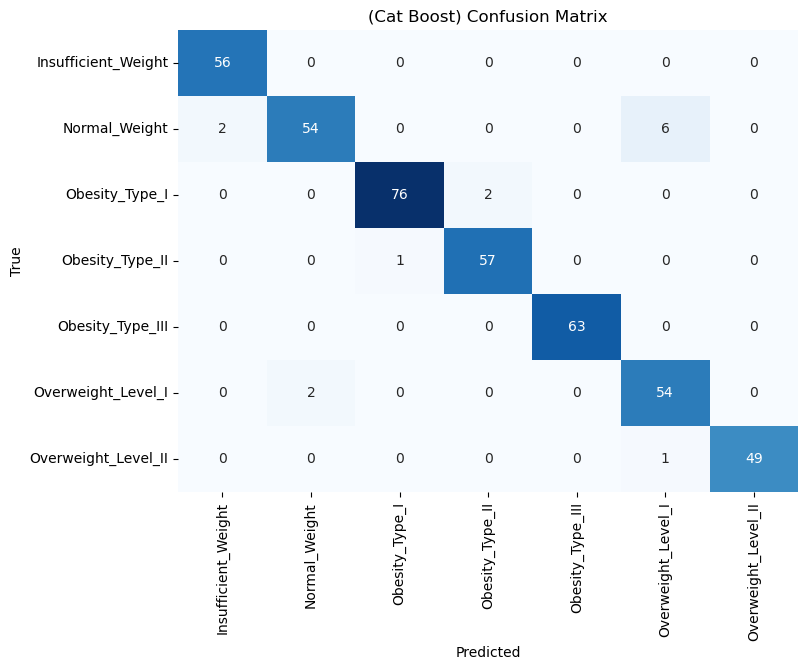

In [42]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(random_state=42, verbose=0)
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

grid_search = GridSearchCV(estimator=cb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_cb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred_cb = best_cb.predict(X_test_scaled)

# Evaluasi model
print("(Cat Boost) Accuracy:", accuracy_score(y_test, y_pred_cb))
print("(Cat Boost) Classification Report:\n", classification_report(y_test, y_pred_cb))
cm = confusion_matrix(y_test, y_pred_cb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("(Cat Boost) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()